In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_df=load_boston()

In [4]:
#creating a dataframe
df=pd.DataFrame(boston_df.data,columns=boston_df.feature_names)

In [5]:
df['Target']=boston_df.target

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [7]:
#dropping columns of CHAS and ZN > 50% dataset filled with 0 values
df.drop(['CHAS','ZN','B','NOX'],axis=1,inplace=True)

In [8]:
df_1=df.copy()

In [9]:
df.drop(['Target'],axis=1,inplace=True)

In [10]:
#training datasets after dropping CHAS, ZN
df_y1=pd.DataFrame(df_1.Target)
df_x1=pd.DataFrame(df)

In [11]:
#importing functions for linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [12]:
reg_2=linear_model.LinearRegression()
reg_2.fit(df_x1,df_y1)

LinearRegression()

In [13]:
##train,test again code basics after dropping CHAS and ZN
X1_train,X1_test,Y1_train,Y1_test=train_test_split(df_x1,df_y1,test_size=0.3,random_state=42)

In [14]:
reg_2.fit(X1_train,Y1_train)

LinearRegression()

In [15]:
reg_2.score(X1_train,Y1_train)

0.7135060002138576

In [16]:
reg_2.fit(X1_test,Y1_test)

LinearRegression()

In [17]:
reg_2.score(X1_test,Y1_test)

0.7131805215724436

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
#transforming without fitting
Sc_X_train=scaler.fit_transform(X1_train)
Sc_X_test=scaler.transform(X1_test)

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(Sc_X_train,Y1_train)

LinearRegression(normalize=True)

In [21]:
score_train = lin_reg.score(Sc_X_train, Y1_train)
print(score_train)

0.7135060002138576


In [22]:
Y1_pred=reg_2.predict(X1_train)

In [23]:
from sklearn.svm import SVR

reg=SVR(kernel='rbf')
reg.fit(X1_train, Y1_train)


svr_score_train = reg.score(X1_train, Y1_train) #Coefficient of determination
svr_score_test =reg.score(X1_test, Y1_test)

print('train score: {}'.format(svr_score_train)) 
print('test score: {}'.format(svr_score_test))

train score: 0.15229484656977332
test score: 0.2682782410685398


C:\Users\sanyalam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


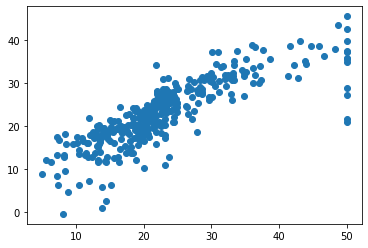

In [24]:
plt.scatter(Y1_train,Y1_pred)

## Standardisation

In [25]:
scaler=StandardScaler()
#fitting the scaler to training set to learn the parameters
scaler.fit(X1_train)
#transforming training and test sets
X_train_scaled=scaler.transform(X1_train)
X_test_scaled=scaler.transform(X1_test)

In [26]:
#mean of the features from the training dataset
scaler.mean_

array([  3.46988686,  11.13305085,   6.32567232,  68.79971751,
         3.76587401,   9.43785311, 407.04237288,  18.2779661 ,
        12.42112994])

In [27]:
#standard deviation
scaler.scale_

array([  8.30407703,   6.92884344,   0.71819446,  27.62625716,
         2.12302684,   8.62775916, 166.28686979,   2.25360235,
         7.1023496 ])

In [28]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X1_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X1_test.columns)

In [29]:
np.round(X_train_scaled.describe(),2)

,CRIM,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-1.43,-3.43,-2.39,-1.24,-0.98,-1.32,-2.52,-1.51
25%,-0.41,-0.87,-0.61,-0.82,-0.80,-0.63,-0.77,-0.72,-0.78
50%,-0.39,-0.21,-0.14,0.31,-0.31,-0.51,-0.46,0.14,-0.21
75%,-0.02,1.01,0.50,0.89,0.77,1.69,1.56,0.85,0.54
max,10.30,2.40,3.42,1.13,3.94,1.69,1.83,1.65,3.60


In [30]:
model_scaled=LinearRegression().fit(X_train_scaled,Y1_train)

In [31]:
model_scaled.score(X_train_scaled,Y1_train)

0.7135060002138576

In [32]:
y_pred_scaled=model_scaled.predict(X_test_scaled)

In [33]:
model_scaled1=LinearRegression().fit(y_pred_scaled,Y1_test)

In [34]:
model_scaled1.score(y_pred_scaled,Y1_test)

0.6859218496267476

## MIN-MAX SCALER

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [36]:
scaler.fit(X1_train)

MinMaxScaler()

In [37]:
#transforming train and test sets
X_train_minmax=scaler.transform(X1_train)
X_test_minmax=scaler.transform(X1_test)

In [38]:
#storing mean of the features
scaler.data_max_

array([ 88.9762,  27.74  ,   8.78  , 100.    ,  12.1265,  24.    ,
       711.    ,  22.    ,  37.97  ])

In [39]:
#scaled dataset
scaler.scale_

array([0.01124011, 0.03769318, 0.20337604, 0.01029866, 0.09093472,
       0.04347826, 0.0019084 , 0.10638298, 0.02759382])

In [40]:
X_train_final_minmax=pd.DataFrame(X_train_minmax,columns=X1_train.columns)
X_test_final_minmax=pd.DataFrame(X_test_minmax,columns=X1_test.columns)

In [41]:
X_train_final_minmax.head()

,CRIM,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.000234,0.036562,0.522066,0.574665,0.448545,0.086957,0.066794,0.648936,0.096026
1,0.001377,0.331700,0.470409,0.716787,0.145541,0.217391,0.467557,0.553191,0.284492
2,0.001825,0.214851,0.369941,0.318229,0.361084,0.086957,0.087786,0.563830,0.233996
3,0.011744,0.261214,0.421395,0.271885,0.306359,0.130435,0.229008,0.893617,0.133830
4,0.174971,0.636638,0.419565,0.701339,0.161755,1.000000,0.914122,0.808511,0.452539


In [42]:
m1_scaled=LinearRegression().fit(X_train_final_minmax,Y1_train)

In [43]:
m1_scaled.score(X_train_final_minmax,Y1_train)

0.7135060002138576

In [44]:
## XGBoost Regressor

In [45]:
! pip install xgboost

In [46]:
from xgboost import XGBRegressor
reg_boost=XGBRegressor()
reg_boost.fit(X1_train,Y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
y_pred_boost=reg_boost.predict(X1_train)

In [48]:
#this shows that the regression boost mechanism is best fit for housing dataset
reg_boost.score(X1_train, Y1_train)

0.9999939652251802

In [49]:
reg_boost.fit(X1_test,Y1_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
reg_boost.score(X1_test,Y1_test)

0.9999999659101004

In [ ]:
##Plot